# 1D Heat Condution

Given: The physics of the situation is governed by the differential equation of _pure diffusion_:

$$
\dfrac{\mathrm{d}^2 T\left(t, x\right)}
{\mathrm{d}x^2}=
0
$$

subject to the

- Initial conditions: $T\left(0, 1\right)=1$, $T\left(0, x\right)=0$ for $x < 1$.
- Boundary conditions: $T\left(t, 0\right)=0$, $T\left(t, 1\right)=1$.

Objective: To calculate the temperature distribution, $T\left(x\right)$ at equilibrium.

## Solution

1. Convert physical geometry into a computational mesh.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(start=0, stop=1, num=6)
N_t = 73  # time steps

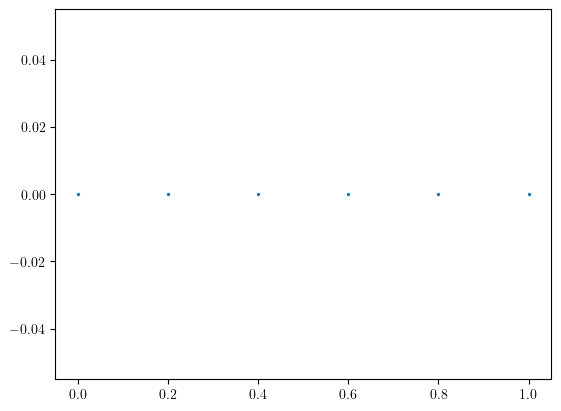

In [4]:
plt.scatter(x, np.zeros_like(x), s=2)

2. Discretize the governing equation on this mesh using a numerical scheme.

$$
\dfrac{\mathrm{d}^2 T\left(t, x\right)}
{\mathrm{d}x^2}\approx
\dfrac{T_{i+1}-2T_i+T_{i-1}}{{\left(\Delta x\right)}^{2}}=
0
\implies
T_{i}\approx
\dfrac{1}{2}
\left(T_{i+1}+T_{i-1}\right).
$$

In [5]:
T = np.empty_like(x)
T[:-1], T[-1] = 0, 1  # Initial condition

In [6]:
for t in range(N_t):
    T[0], T[-1] = 0, 1  # Boundary condition
    T[1:-1] = 0.5 * (T[2:] + T[:-2])

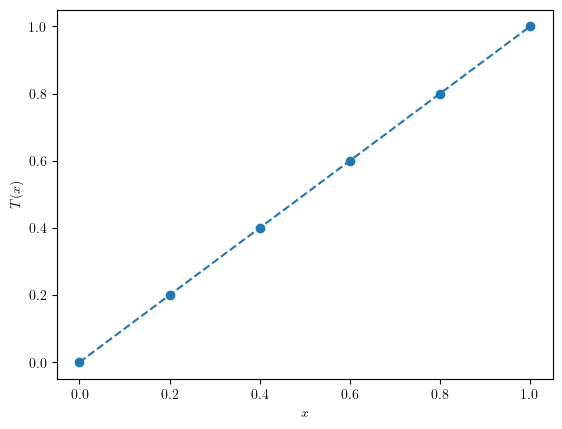

In [7]:
plt.plot(x, T, "o--")
plt.xlabel("$x$")
plt.ylabel("$T(x)$");

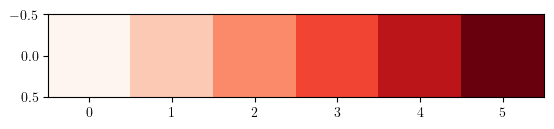

In [8]:
plt.imshow(T[np.newaxis], cmap="Reds");

### Discretization exercise

1D convection diffusion equation

$$
U\left(x\right)
\dfrac{\mathrm{d}T\left(x\right)}{\mathrm{d}x}+
\dfrac{\mathrm{d}^{2}T\left(x\right)}{\mathrm{d}x^{2}}
=0.
$$

Use a central difference based discretization for both the derivatives:

$$
T_{i}=
\left(\dfrac{1}{2}+\dfrac{U\Delta x}{4}\right)T_{i+1}+
\left(\dfrac{1}{2}-\dfrac{U\Delta x}{4}\right)T_{i-1}.
$$

In [19]:
x, dx = np.linspace(start=0, stop=1, num=10, retstep=True)
N_t = 30  # time steps
U = 1  # speed

In [20]:
T = np.empty_like(x)
T[:-1], T[-1] = 0, 0  # Initial condition

In [21]:
L, R = (0.5 + U * dx / 4), (0.5 - U * dx / 4)

In [22]:
for t in range(N_t):
    T[0], T[-1] = 0, 1  # Boundary condition
    T[1:-1] = L * T[2:] + R * T[:-2]

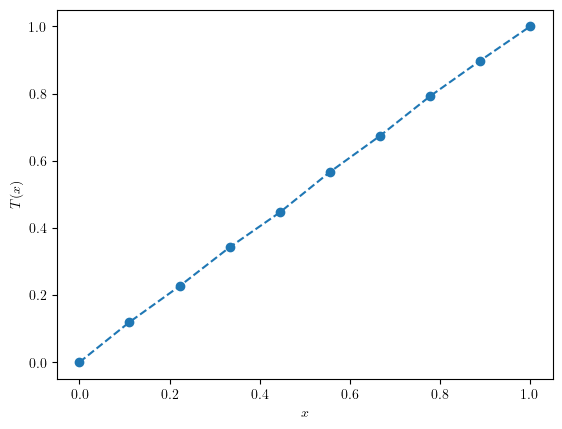

In [23]:
plt.plot(x, T, "o--")
plt.xlabel("$x$")
plt.ylabel("$T(x)$");